In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
import pandas as pd
import csv
import os

In [4]:
path = "LifeExpectancy"
files= os.listdir(path)

ddd = {}
name1 = "LifeExpectancy/"

for file in files:
    
    once = False
    if file.endswith(".CSV"):  
        
        name = file[:-4].replace("_", " ")
        ll = name.split()
        
        for i in range(len(ll)):
            ll[i] = ll[i][0] + ll[i][1:].lower()
            
        name = " ".join(ll)
        if name in us_state_abbrev.keys():
            name = us_state_abbrev[name]
            


        with open(name1+file) as f:
            lines = f.readlines()
            lis = []
            for line in lines:
                line = line.strip().split(",")
                if once:
                    if line[5] != "3":
                        break
                if line[5] == "3":
                    once = True
                    lis.append(float(line[11]))
            ddd[name] = lis
        
ddd

{'OK': [73.60550872,
  73.75945201,
  74.06027083,
  74.22084945,
  74.29260222,
  74.27453643,
  74.27199034,
  74.35113083,
  74.27865651,
  74.36887835,
  74.48790368,
  74.56625899,
  74.70487035,
  74.53256813,
  74.56209291,
  74.54715295,
  74.82565917,
  75.06166684,
  75.19169868,
  75.1515399,
  75.13507535,
  75.05851873,
  75.09275442,
  75.14369001,
  75.47834479,
  75.31103493,
  75.52732873,
  75.64499013,
  75.72211594,
  75.98879201,
  76.12410521,
  76.07522935,
  76.2152952,
  76.08449072,
  76.09238601],
 'RI': [74.71461591,
  75.01322972,
  75.44052956,
  75.50937723,
  75.59727409,
  75.61210304,
  75.72295798,
  75.86848772,
  76.0285272,
  76.23645849,
  76.43376847,
  76.65374096,
  76.81658371,
  76.81531772,
  77.04939435,
  77.06116159,
  77.42601401,
  77.6409866,
  77.96098557,
  78.02434437,
  77.92628683,
  77.97891083,
  77.9802361,
  78.29386046,
  78.61760539,
  78.58988031,
  78.82864754,
  79.01657293,
  79.20039522,
  79.45802823,
  79.58146097,
  

In [5]:
len(ddd)

51

In [6]:
df = pd.DataFrame.from_dict(ddd,orient = "index",columns = range(1980,2015))

In [7]:
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
OK,73.605509,73.759452,74.060271,74.220849,74.292602,74.274536,74.271990,74.351131,74.278657,74.368878,...,75.311035,75.527329,75.644990,75.722116,75.988792,76.124105,76.075229,76.215295,76.084491,76.092386
RI,74.714616,75.013230,75.440530,75.509377,75.597274,75.612103,75.722958,75.868488,76.028527,76.236458,...,78.589880,78.828648,79.016573,79.200395,79.458028,79.581461,79.645705,79.848833,79.765546,79.758880
GA,71.974511,72.259922,72.714976,72.819085,72.997619,73.015305,73.108587,73.260482,73.287464,73.440483,...,76.054479,76.185484,76.469242,76.633408,76.830373,77.082579,77.224695,77.371998,77.384511,77.381933
MN,75.983601,76.286290,76.576344,76.691464,76.820345,76.849163,76.925123,77.090437,77.191692,77.421983,...,79.800924,80.003951,80.199620,80.326597,80.529663,80.700896,80.731573,80.884821,80.907526,80.904180
IN,73.625986,73.833381,74.222011,74.325052,74.473551,74.502868,74.498046,74.662351,74.650942,74.874653,...,76.778890,76.913797,77.266649,77.309890,77.447475,77.697555,77.687426,77.721935,77.723370,77.693674


In [8]:
import geopandas as gpd

In [9]:
us = gpd.read_file("zip://states.zip")
us.set_index("STUSPS", drop=False, inplace=True)
continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
ak = us.loc["AK":"AK"]
hi = us.loc["HI":"HI"]
pr = us.loc["PR":"PR"]

In [10]:
continent.index

Index(['MD', 'IA', 'DE', 'OH', 'PA', 'NE', 'WA', 'AL', 'AR', 'NM', 'TX', 'CA',
       'KY', 'GA', 'WI', 'OR', 'MO', 'VA', 'TN', 'LA', 'NY', 'MI', 'ID', 'FL',
       'IL', 'MT', 'MN', 'IN', 'MA', 'KS', 'NV', 'VT', 'CT', 'NJ', 'DC', 'NC',
       'UT', 'ND', 'SC', 'MS', 'CO', 'SD', 'OK', 'WY', 'WV', 'ME', 'NH', 'AZ',
       'RI'],
      dtype='object', name='STUSPS')

In [11]:
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation

In [13]:
def plot(year,ax_list):
    for states in df.index:
        if states not in continent.index:
            continue
        if df.loc[states,year] >=80:
            continent.loc[states,"color"] = "brown"
        elif df.loc[states,year] >=76:
            continent.loc[states,"color"] = "red"
        elif df.loc[states,year] >=72:
            continent.loc[states,"color"] = "tomato"
        elif df.loc[states,year] >=68:
            continent.loc[states,"color"] = "lightsalmon"
        if states == "AK":
            if df.loc[states,year] >=80:
                ak.loc[states,"color"] = "brown"
            elif df.loc[states,year] >=76:
                ak.loc[states,"color"] = "red"
            elif df.loc[states,year] >=72:
                ak.loc[states,"color"] = "tomato"
            elif df.loc[states,year] >=68:
                ak.loc[states,"color"] = "lightsalmon"
        if states == "HI":
            if df.loc[states,year] >=80:
                hi.loc[states,"color"] = "brown"
            elif df.loc[states,year] >=76:
                hi.loc[states,"color"] = "red"
            elif df.loc[states,year] >=72:
                hi.loc[states,"color"] = "tomato"
            elif df.loc[states,year] >=68:
                hi.loc[states,"color"] = "lightsalmon"
    continent.plot(color=continent["color"], edgecolor="k", ax=ax_list[0])
    ak.plot(color=ak["color"], edgecolor="k", ax=ax_list[1])
    hi.plot(color=hi["color"], edgecolor="k", ax=ax_list[2])
    pr.plot(color=0, edgecolor="k", ax=ax_list[3])
    ax_list[0].set_title("Life Expectancy in the US in"+str(year),size = 20)
    

In [14]:
def video(vidname):
    fig = plt.figure(figsize = (14,10))
    patch1 = mpatches.Patch(color='brown', label="80+ years")
    patch2 = mpatches.Patch(color='red', label="[76,80) years")
    patch3 = mpatches.Patch(color='tomato', label="[72-76) years")
    patch4 = mpatches.Patch(color='lightsalmon', label="[68-72) years")
    plt.legend(handles=[patch1,patch2,patch3,patch4],loc = "center right")
    gs = fig.add_gridspec(5, 3)
    ax1 = fig.add_subplot(gs[:3, :])
    ax2 = fig.add_subplot(gs[3, 0])
    ax3 = fig.add_subplot(gs[3, 1])
    ax4 = fig.add_subplot(gs[3, 2])
    ax2.set_xlim(-180, -120)
    for ax in fig.axes:
        ax.axis("off")
    year = list(range(1980,2015))
    def plot_again(year):
        plot(year,ax_list=[ax1,ax2,ax3,ax4])
    anim = FuncAnimation(fig, plot_again, frames=year, interval=1000)
    html = anim.to_html5_video()
    with open(vidname,"w") as f:
        f.write(html)
    

In [15]:
#video("my_video")

/home/wen.ye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/wen.ye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


KeyError: 'color'

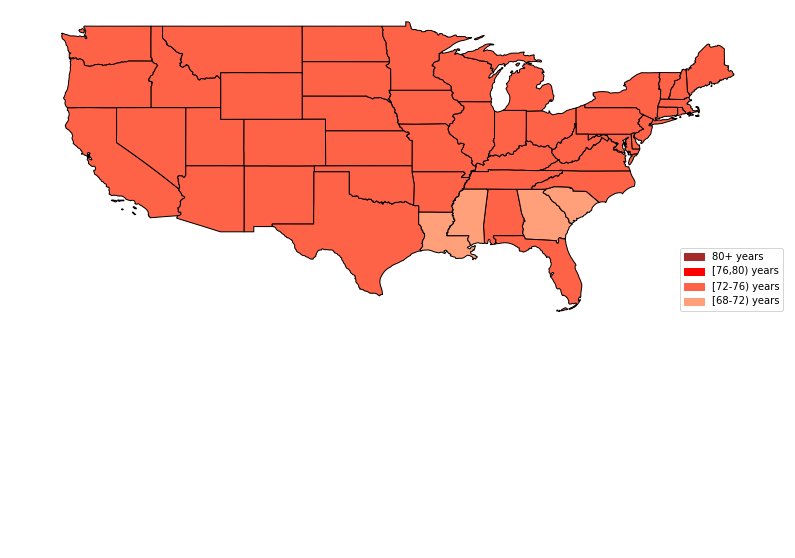

In [16]:
fig = plt.figure(figsize = (14,10))
patch1 = mpatches.Patch(color='brown', label="80+ years")
patch2 = mpatches.Patch(color='red', label="[76,80) years")
patch3 = mpatches.Patch(color='tomato', label="[72-76) years")
patch4 = mpatches.Patch(color='lightsalmon', label="[68-72) years")
plt.legend(handles=[patch1,patch2,patch3,patch4],loc = "center right")
gs = fig.add_gridspec(5, 3)
ax1 = fig.add_subplot(gs[:3, :])
ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax4 = fig.add_subplot(gs[3, 2])
ax2.set_xlim(-180, -120)
for ax in fig.axes:
    ax.axis("off")
plot(1980,[ax1,ax2,ax3,ax4])